## Run the blocks below only for the first time
### Install dependencies

In [ ]:
%%bash
sh env.sh

### Download pretrained models (may take a minute)

In [6]:
import yaml
import sys
import requests
import os
import re
import tarfile
import shutil
# for zip file
import zipfile


# url = "https://onedrive.live.com/?cid=5435770760f02d2f&id=5435770760F02D2F%211152&authkey=!AD6jcLtyet8Y3o4"
    
# r = requests.get(url, allow_redirects=True)

# open('cpvton-plus-checkpoints.zip', 'wb').write(r.content)

def download(url, filename, cookies=None):
    with open(filename, 'wb') as f:
        response = requests.get(url, stream=True, cookies=cookies)
        total = response.headers.get('content-length')

        if total is None:
            f.write(response.content)
        else:
            downloaded = 0
            total = int(total)
            for data in response.iter_content(chunk_size=max(int(total/1000), 1024*1024)):
                downloaded += len(data)
                f.write(data)
                completed = int(50*downloaded/total)
                sys.stdout.write('\r[{}{}]'.format(
                    '█' * completed, '.' * (50-completed)))
                sys.stdout.flush()
    sys.stdout.write('\n')


In [2]:
drive_request = requests.get(
    'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=199dwgFGlumJ95MAGNbLnYtbVKA2w6kdc')
confirm_page = drive_request.text
confirmation_code = re.findall('confirm=(.{4})', confirm_page)[0]

print('[*] Downloading data...')
download('https://drive.google.com/uc?export=download&confirm=CONFIRM&id=199dwgFGlumJ95MAGNbLnYtbVKA2w6kdc'.replace(
    'CONFIRM', confirmation_code), 'cpvton-plus-checkpoints.zip', cookies=drive_request.cookies)
print('[^] Download complete')

[*] Downloading data...

[^] Download complete


### Excuate the block below once you see a 'cpvton-plus-checkpoints.zip' in the storage directory
#### Extract the checkpoint to 'storage/checkpoints-cpvton-plus' directory and delete the zip file

In [ ]:
if not os.path.exists('checkpoints-cpvton-plus'):
    os.makedirs('checkpoints-cpvton-plus')
checkpoint = zipfile.ZipFile("cpvton-plus-checkpoints.zip")
checkpoint.extractall(path='checkpoints-cpvton-plus')
shutil.move('checkpoints-cpvton-plus/checkpoints/GMM/', 'checkpoints-cpvton-plus/GMM/')
shutil.move('checkpoints-cpvton-plus/checkpoints/TOM/', 'checkpoints-cpvton-plus/TOM/')
os.rmdir('checkpoints-cpvton-plus/checkpoints')
os.remove('cpvton-plus-checkpoints.zip')

In [ ]:
os.rmdir('checkpoints-cpvton-plus/checkpoints')

### Download the whole VITON datasets and relocate the data (may take 20 minutes or so)

In [ ]:
if not os.path.exists('data'):
    os.makedirs('data')

In [ ]:

drive_request = requests.get(
    'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1MxCUvKxejnwWnoZ-KoCyMCXo3TLhRuTo')
confirm_page = drive_request.text
confirmation_code = re.findall('confirm=(.{4})', confirm_page)[0]

print('[*] Downloading data...')
download('https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1MxCUvKxejnwWnoZ-KoCyMCXo3TLhRuTo'.replace(
    'CONFIRM', confirmation_code), 'data/viton_resize.tar.gz', cookies=drive_request.cookies)

tarfile.open("data/viton_resize.tar.gz").extractall(path='data/')

shutil.move('data/viton_resize/test/', 'data/test/')
shutil.move('data/viton_resize/train/', 'data/train/')

os.rmdir('data/viton_resize/')
os.remove('data/viton_resize.tar.gz')

## Run the blocks above only for the first time
### Run blocks below for test stage
#### Change directory to root 
##### Run blocks below once you see train and test folders in 'storage/data' directory

In [1]:
import os
os.chdir('../notebooks')
if (os. getcwd() == '/notebooks'):
    print('Now working in the right location')
else:
    print('ERROE! Current directory is:', os. getcwd())
        

Now working in the right location


### Build GMM results to wrap the clothes based on test models' poses (I changed the python scripts directly so below commends run by bash)
### Each lines may take a long time to run
#### You can check the results after the procedure finished

### Preprocessing Stage 
#### Generate stage one sagementation results with neck features

In [ ]:
%%bash
python dataset_neck_skin_correction.py

In [ ]:
%%bash
python body_binary_masking.py

### CIHP_PGN pretrained model

In [ ]:
drive_request = requests.get(
    'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1Mqpse5Gen4V4403wFEpv3w3JAsWw2uhk')
confirm_page = drive_request.text
confirmation_code = re.findall('confirm=(.{4})', confirm_page)[0]

print('[*] Downloading data...')
download('https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1Mqpse5Gen4V4403wFEpv3w3JAsWw2uhk'.replace(
    'CONFIRM', confirmation_code), 'CIHP_PGN-checkpoints.zip', cookies=drive_request.cookies)
print('[^] Download complete')
if not os.path.exists('checkpoints-CIHP_PGN'):
    os.makedirs('checkpoints-CIHP_PGN')
checkpoint = zipfile.ZipFile("CIHP_PGN-checkpoints.zip")
checkpoint.extractall(path='checkpoints-CIHP_PGN')

os.remove('CIHP_PGN-checkpoints.zip')

Alpha pose model

In [20]:
drive_request = requests.get(
    'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9')
confirm_page = drive_request.text
confirmation_code = re.findall('confirm=(.{4})', confirm_page)[0]

print('[*] Downloading data...')
download('https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1kfyedqyn8exjbbNmYq8XGd2EooQjPtF9'.replace(
    'CONFIRM', confirmation_code), 'fast_421_res152_256x192.pth', cookies=drive_request.cookies)
print('[^] Download complete')




[*] Downloading data...

[^] Download complete


object detection model

In [4]:
drive_request = requests.get(
    'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC')
confirm_page = drive_request.text
confirmation_code = re.findall('confirm=(.{4})', confirm_page)[0]

print('[*] Downloading data...')
download('https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1D47msNOOiJKvPOXlnpyzdKA3k6E97NTC'.replace(
    'CONFIRM', confirmation_code), 'yolov3-spp.weights', cookies=drive_request.cookies)
print('[^] Download complete')

[*] Downloading data...

[^] Download complete


### GMM results

In [ ]:
%%bash
python test.py --name GMM --dataroot storage/data --stage GMM --workers 4 --datamode test --data_list test_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/checkpoints/GMM/gmm_final.pth


In [ ]:
%%bash
cp -r storage/result-cpvton-plus/GMM/test/warp-cloth storage/data/test
cp -r storage/result-cpvton-plus/GMM/test/warp-mask storage/data/test



In [ ]:
%%bash
python test.py --name TOM --dataroot storage/data --stage TOM --workers 4 --datamode test --data_list test_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/TOM/tom_final.pth

In [ ]:
%%bash
mv -r result storage/result

 ### The results for cp-vton-plus now can be checked in 'storage/result/TOM/test/try-on'

### Training Stage

In [ ]:
%%bash
python train.py --name GMM --dataroot storage/data --stage GMM --workers 4 --decay_step 35000 --keep_step 35000 --data_list train_pairs.txt --checkpoint_dir storage/checkpoints-cpvton-plus/ --save_count 5000 --shuffle --tensorboard_dir storage/tensorboard-CPVTON-plus

In [ ]:
%%bash
python test.py --name GMM --dataroot storage/data --stage GMM --workers 4 --datamode train --data_list train_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/GMM/gmm_raw.pth --result_dir storage/result-cpvton-plus 

In [ ]:
%%bash
cp -r storage/result-cpvton-plus/GMM/train/warp-cloth storage/data/train
cp -r storage/result-cpvton-plus/GMM/train/warp-mask storage/data/train

In [ ]:
%tensorboard  --logdir= storage/tensorboard-CPVTON-plus

In [ ]:
%load_ext tensorboard

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
python train.py --name TOM --dataroot storage/data --stage TOM --workers 4 --decay_step 35000 --keep_step 35000 --data_list train_pairs.txt --checkpoint_dir storage/checkpoints-cpvton-plus/ --save_count 5000 --shuffle --tensorboard_dir storage/tensorboard-CPVTON-plus

In [ ]:
pip install coremltools

In [9]:
# Jen added: Trace model
import torch
import torchvision

In [ ]:
torch_model = torch.load('storage/checkpoints-cpvton-plus/TOM/tom_raw.pth')
torch_model.eval()

In [11]:
# MARK: Please try the tracing method here

example_input = torch.rand(64, 26, 192,256)
traced_model = torch.jit.trace(torch_model,example_input.cuda())

In [12]:
print(torch.__version__)

1.6.0


In [6]:
import os
import zipfile

def zipdir(path, ziph):
    # ziph is zipfile handle
    for root, dirs, files in os.walk(path):
        for file in files:
            ziph.write(os.path.join(root, file))




In [5]:
zipf = zipfile.ZipFile('train-opt.zip', 'w', zipfile.ZIP_DEFLATED)
zipdir('storage/data/train-opt', zipf)
zipf.close()

In [ ]:
%%bash
python cloth_binary_masking.py

In [ ]:
python train.py --name GMM --dataroot storage/data --datamode train-opt --stage GMM --workers 4 --decay_step 35000 --keep_step 35000 --data_list train_pairs.txt --checkpoint_dir storage/checkpoints-cpvton-plus/ --save_count 5000 --shuffle --tensorboard_dir storage/tensorboard-CPVTON-plus

In [ ]:
python test.py --name GMM --dataroot storage/data --stage GMM --workers 4 --datamode train-opt --data_list train_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/GMM/gmm_opt.pth --result_dir storage/result-cpvton-plus-opt 

In [ ]:
%%bash
cp -r storage/result-cpvton-plus-opt/GMM/train-opt/warp-cloth storage/data/train-opt
cp -r storage/result-cpvton-plus-opt/GMM/train-opt/warp-mask storage/data/train-opt

In [ ]:
%%bash
python test.py --name GMM --dataroot storage/data --stage GMM --workers 4 --datamode test-end2end --data_list train_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/GMM/gmm_raw.pth --result_dir storage/result-cpvton-plus 

### new mission: TRAIN TOM

In [ ]:
python train.py --name TOM --dataroot storage/data --stage TOM --workers 4 --datamode train-opt --data_list train_pairs.txt --checkpoint_dir storage/checkpoints-cpvton-plus/ --save_count 5000 --shuffle --tensorboard_dir storage/tensorboard-CPVTON-plus

In [3]:
drive_request = requests.get(
    'https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1B-__YtFz9S8zXWiwF4WEoFh_213dHaaC')
confirm_page = drive_request.text
confirmation_code = re.findall('confirm=(.{4})', confirm_page)[0]

print('[*] Downloading data...')
download('https://drive.google.com/uc?export=download&confirm=CONFIRM&id=1B-__YtFz9S8zXWiwF4WEoFh_213dHaaC'.replace(
    'CONFIRM', confirmation_code), 'joint-points-test.zip', cookies=drive_request.cookies)
print('[^] Download complete')




[*] Downloading data...

[^] Download complete


In [ ]:
checkpoint = zipfile.ZipFile("joint-points-test.zip")
checkpoint.extractall(path='storage/data/')

In [ ]:
python segamentation/simple_extractor.py --dataset 'lip' --model-restore storage/checkpoints-humanParsing/exp-schp-201908261155-lip.pth --input-dir storage/data/test-end2end/image --output-dir storage/data/test-end2end/image-parse

In [ ]:
python test.py --name GMM --dataroot storage/data --stage GMM --workers 4 --datamode test-end2end --data_list test_end2end_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/GMM/gmm_opt.pth --result_dir storage/result-cpvton-plus-testend2end 

<span style="color:purple;font-size:48px">Test TOM by end2end dataset</span>

### check working directory

In [16]:
import os, subprocess, sys, datetime, signal, shutil
os.chdir('../notebooks')
if (os. getcwd() == '/notebooks'):
    print('Now working in the right location')
else:
    print('ERROE! Current directory is:', os. getcwd())
        

Now working in the right location


### Clear the test dataset

In [17]:
cmd_clear = "rm -r storage/data/test-end2end"
subprocess.call(cmd_clear, shell=True)

0

## Choose either blocks in red flags or blocks in blue flags
## Test by testing dataset from VITON follow instructions within red flags
## Test by customised datast follow instructions within blue flags
<span style="color:red;font-size:28px">⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑</span>
### Write cloth image pair to 'storage/data/test_end2end_pair.txt'
#### image and cloth must be exist in storage/data/test/image and storage/data/test/cloth
#### e.g. 000010_0.jpg 000001_1.jpg 

### Initial test files

In [29]:
dataroot = 'storage/data/'
data_list = 'test_end2end_pairs.txt'
cloth_src = 'storage/data/test/cloth'
image_src = 'storage/data/test/image'
cloth_dir = 'storage/data/test-end2end/cloth'
image_dir = 'storage/data/test-end2end/image'
pose_src = 'storage/data/test-opt/pose'
pose_dir = 'storage/data/test-end2end/pose'
im_names = []
c_names = []
if not os.path.exists(cloth_dir):
    os.makedirs(cloth_dir)
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
if not os.path.exists(pose_dir):
    os.makedirs(pose_dir)
with open(os.path.join(dataroot, data_list), 'r') as f:
            for line in f.readlines():
                im_name, c_name = line.strip().split()
                im_names.append(im_name)
                c_names.append(c_name)
def copy_files_dir(files_list, src, dest):
    src_files = os.listdir(src)
    for file_name in src_files:
        if file_name in files_list:
            shutil.copy(os.path.join(src, file_name), dest)
poses = os.listdir(pose_src)
for pose in poses:
    image_name = pose.split('_')[0]+'_0.jpg'
    if image_name in im_names:
        shutil.copy(os.path.join(pose_src, pose), pose_dir)
    
copy_files_dir(im_names, image_src, image_dir)
copy_files_dir(c_names, cloth_src, cloth_dir)
print("clothes and models you choose should be located in storage/data/test-end2end, please check (reload folder may take a few second)!!!")

clothes and models you choose should be located in storage/data/test-end2end, please check (reload folder may take a few second)!!!


<span style="color:red;font-size:28px">⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑</span>
### Test by customised datast
<span style="color:blue;font-size:28px">⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑</span>
#### Initial empty directories

In [18]:
dataroot = 'storage/data/'
data_list = 'test_end2end_pairs.txt'
cloth_dir = 'storage/data/test-end2end/cloth'
image_dir = 'storage/data/test-end2end/image'
pose_dir = 'storage/data/test-end2end/pose'
if not os.path.exists(cloth_dir):
    os.makedirs(cloth_dir)
if not os.path.exists(image_dir):
    os.makedirs(image_dir)
if not os.path.exists(pose_dir):
    os.makedirs(pose_dir)

#### 1.Upload the clothes images 'storage/data/test-end2end/cloth' 
#### 2.Upload the clothes images 'storage/data/test-end2end/cloth'
#### 3.Write cloth image pair to 'storage/data/test_end2end_pair.txt'
##### image and cloth name must be in .jpg form
##### e.g. 000010_0.jpg 000001_1.jpg 

#### 4.Resize the clothes and ref images

In [24]:
import cv2
dim = (192,256)
im_names = []
c_names = []
with open(os.path.join(dataroot, data_list), 'r') as f:
            for line in f.readlines():
                im_name, c_name = line.strip().split()
                im_names.append(im_name)
                c_names.append(c_name)
def resize_files_dir(files_list, src):
    src_files = os.listdir(src)
    for file_name in src_files:
        img_pth = os.path.join(src, file_name)        
        if os.path.isfile(img_pth):
            # Load images
            img = cv2.imread(img_pth)
            img_new = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
            cv2.imwrite(img_pth, img_new)
        else:
            shutil.rmtree(img_pth)
resize_files_dir(im_names, image_dir)
resize_files_dir(c_names, cloth_dir)

#### Check the cloth and image output before you run block below
#### 5.Pose detection

In [25]:
os.chdir('AlphaPose')
if (os. getcwd() == '/notebooks/AlphaPose'):
    print('Now working in the right location')
else:
    print('ERROE! Current directory is:', os. getcwd())

Now working in the right location


In [26]:
cmd_pose = "python scripts/demo_inference.py --cfg configs/coco/resnet/256x192_res152_lr1e-3_1x-duc.yaml --checkpoint fast_421_res152_256x192.pth --indir ../storage/data/test-end2end/image --outdir ../storage/data/test-end2end/pose"
subprocess.call(cmd_pose, shell=True)
os.chdir('../')
if (os. getcwd() == '/notebooks'):
    print('Now joint JSON finished and working in the right location')
else:
    print('ERROE! Current directory is:', os. getcwd())

Now joint JSON finished and working in the right location


<span style="color:blue;font-size:28px">⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑⚑</span>
### Run code below after finish red/blue clocks

### Data preprocessing all in one

In [27]:
cmd1 = "python segamentation/simple_extractor.py --dataset 'lip' --model-restore storage/checkpoints-humanParsing/exp-schp-201908261155-lip.pth --input-dir storage/data/test-end2end/image --output-dir storage/data/test-end2end/image-parse"
subprocess.call(cmd1, shell=True)

# add neck to segamentation
cmd2 = "python dataset_neck_skin_correction.py"
subprocess.call(cmd2, shell=True)

# binary masking
cmd3 = "python body_binary_masking.py"
subprocess.call(cmd3, shell=True)
# clothes mask
cmd4 = "python cloth_binary_masking.py"
subprocess.call(cmd4, shell=True)
#GMM
cmd5 = "python test.py --name GMM --dataroot storage/data --stage GMM --workers 4 --datamode test-end2end --data_list test_end2end_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/GMM/gmm_opt.pth --result_dir storage/result-cpvton-plus-opt"
subprocess.call(cmd5, shell=True)
#Move GMM results to working directory
if os.path.exists("storage/data/test-end2end/warp-cloth"):
    cmd6 = "mv -v storage/result-cpvton-plus-opt/GMM/test-end2end/warp-cloth/* storage/data/test-end2end/warp-cloth"
else:
    cmd6 = "mv -v storage/result-cpvton-plus-opt/GMM/test-end2end/warp-cloth storage/data/test-end2end"
subprocess.call(cmd6, shell=True)
if os.path.exists("storage/data/test-end2end/warp-mask"):
    cmd7 = "mv -v storage/result-cpvton-plus-opt/GMM/test-end2end/warp-mask/* storage/data/test-end2end/warp-mask"
else:
    cmd7 = "mv -v storage/result-cpvton-plus-opt/GMM/test-end2end/warp-mask storage/data/test-end2end"
subprocess.call(cmd7, shell=True)

1

### Now it's time to test cp-vton-plus-opt!

In [28]:
cmd8 = "python test.py --name TOM --dataroot storage/data --stage TOM --workers 4 --datamode test-end2end --data_list test_end2end_pairs.txt --checkpoint storage/checkpoints-cpvton-plus/TOM/tom_opt.pth --result_dir storage/result-cpvton-plus-testend2end"
subprocess.call(cmd8, shell=True)

0

### The results saved in storage/result-cpvton-plus-testend2end/TOM/test-end2end

### Do not run blocks below

### zip whole storage for backup

In [15]:
shutil.make_archive('mv_storage', 'zip', "storage")

'/notebooks/mv_storage.zip'

In [3]:
os. getcwd()

'/notebooks'

In [2]:
import shutil

total, used, free = shutil.disk_usage("/")

print("Total: %d GiB" % (total // (2**30)))
print("Used: %d GiB" % (used // (2**30)))
print("Free: %d GiB" % (free // (2**30)))

Total: 8 GiB
Used: 0 GiB
Free: 7 GiB


In [14]:
import os

def get_size(start_path = 'storage'):
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return total_size

print(get_size(), 'bytes')

6748857660 bytes


In [7]:

EXCLUDE_FILES = ['data/test', 'data/test-opt', 'data/train', 'data/train-opt']
tar = tarfile.open("mv_storage.tar.gz", "w:gz")
tar.add("storage", filter=lambda x: None if x.name in EXCLUDE_FILES else x)
tar.close()

In [11]:
os.path.getsize("mv_storage.tar.gz")

128

storage/data/test-end2end/image/model1.jpg
storage/data/test-end2end/image/model2.jpg
storage/data/test-end2end/image/testmodel3.jpg


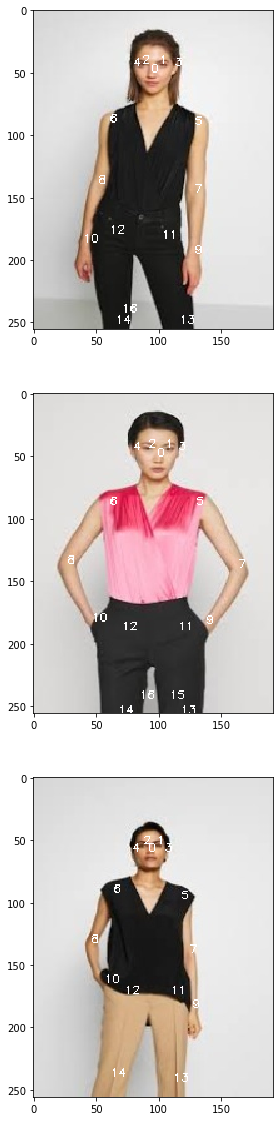

In [40]:
import json
import numpy as np
from pprint import pprint
import cv2
import glob
from matplotlib import pyplot as plt
counter = 1
fig=plt.figure(figsize=(20,20))
for file in glob.glob('storage/data/test-end2end/image/' + "*.jpg"):
    file = file.split('/')[4].split('.')[0]
    with open('storage/data/test-end2end/pose/'+ file + '_keypoints.json') as f:
        data = json.load(f)
        joints = data[0]["keypoints"]
        joints = np.reshape(joints,(-1,3))
    print('storage/data/test-end2end/image/' + file + '.jpg')
    img = cv2.imread('storage/data/test-end2end/image/' + file + '.jpg')


    for i in range(len(joints)):
        font = cv2.FONT_HERSHEY_SIMPLEX
        bottomLeftCornerOfText = (int(joints[i][0]), int(joints[i][1]))
        fontScale = 0.3
        fontColor = (255, 255, 255)
        lineType = 1
        cv2.putText(img, str(i),
                    bottomLeftCornerOfText,
                    font,
                    fontScale,
                    fontColor,
                    lineType)
    fig.add_subplot(3, 1, counter)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    counter = counter+1

plt.show()